# Importing the libraries
We will be needing the following libraries. Make sure you install NumPy, Pandas, Keras, Matplotlib and OpenCV before implementing the following code.

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator 
import pickle 
import pandas as pd 
import random 
import cv2 

np.random.seed(0) 


In [21]:
# Read data 
data = pd.read_csv("signnames.csv") 

with open('train.p', 'rb') as f: 
    train_data = pickle.load(f) 
with open('valid.p', 'rb') as f: 
    val_data = pickle.load(f) 
with open('test.p', 'rb') as f: 
    test_data = pickle.load(f) 

# Extracting the labels from the dictionaries 
X_train, y_train = train_data['features'], train_data['labels'] 
X_val, y_val = val_data['features'], val_data['labels'] 
X_test, y_test = test_data['features'], test_data['labels'] 

# Printing the shapes 
print(X_train.shape) 
print(X_val.shape) 
print(X_test.shape) 


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [22]:
def preprocessing(img): 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img) 
    img = img / 255
    return img 

X_train = np.array(list(map(preprocessing, X_train))) 
X_val = np.array(list(map(preprocessing, X_val))) 
X_test = np.array(list(map(preprocessing, X_test))) 

X_train = X_train.reshape(34799, 32, 32, 1) 
X_val = X_val.reshape(4410, 32, 32, 1) 
X_test = X_test.reshape(12630, 32, 32, 1) 


In [23]:
datagen = ImageDataGenerator(width_shift_range = 0.1, 
                height_shift_range = 0.1, 
                zoom_range = 0.2, 
                shear_range = 0.1, 
                rotation_range = 10) 
datagen.fit(X_train) 

y_train = to_categorical(y_train, 43) 
y_val = to_categorical(y_val, 43) 
y_test = to_categorical(y_test, 43) 


In [24]:
num_classes = 43

def cnn_model(): 
    model = Sequential() 
    model.add(Conv2D(60, (5, 5), 
                    input_shape =(32, 32, 1), 
                    activation ='relu')) 

    model.add(Conv2D(60, (5, 5), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    
    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    
    model.add(Flatten()) 
    model.add(Dense(500, activation ='relu')) 
    model.add(Dropout(0.5)) 
    model.add(Dense(num_classes, activation ='softmax')) 
    
    # Compile model 
    model.compile(Adam(lr = 0.001), 
                loss ='categorical_crossentropy', 
                metrics =['accuracy']) 
    return model 

model = cnn_model() 
history = model.fit_generator(datagen.flow(X_train, y_train, 
                            batch_size = 50), steps_per_epoch = 2000/5, 
                            epochs = 10, validation_data =(X_val, y_val), 
                            shuffle = 1) 


Epoch 1/10
400/400 [==============================] - 43s 107ms/step - loss: 2.9678 - accuracy: 0.2027 - val_loss: 0.6096 - val_accuracy: 0.8186
Epoch 2/10
400/400 [==============================] - 39s 98ms/step - loss: 1.0031 - accuracy: 0.6973 - val_loss: 0.2762 - val_accuracy: 0.9059
Epoch 3/10
400/400 [==============================] - 42s 104ms/step - loss: 0.5532 - accuracy: 0.8282 - val_loss: 0.1560 - val_accuracy: 0.9546
Epoch 4/10
400/400 [==============================] - 39s 98ms/step - loss: 0.4038 - accuracy: 0.8716 - val_loss: 0.1091 - val_accuracy: 0.9667
Epoch 5/10
400/400 [==============================] - 42s 106ms/step - loss: 0.3307 - accuracy: 0.8945 - val_loss: 0.1083 - val_accuracy: 0.9726
Epoch 6/10
400/400 [==============================] - 40s 101ms/step - loss: 0.2835 - accuracy: 0.9114 - val_loss: 0.0844 - val_accuracy: 0.9760
Epoch 7/10
400/400 [==============================] - 39s 98ms/step - loss: 0.2458 - accuracy: 0.9237 - val_loss: 0.0910 - val_accur

Text(0.5, 0, 'epoch')

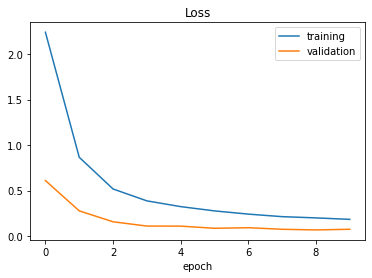

In [25]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['training', 'validation']) 
plt.title('Loss') 
plt.xlabel('epoch') 

Text(0.5, 0, 'epoch')

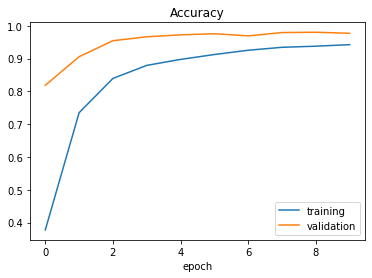

In [26]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['training', 'validation']) 
plt.title('Accuracy') 
plt.xlabel('epoch') 

In [27]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test Loss: ', score[0]) 
print('Test Accuracy: ', score[1]) 


Test Loss:  0.1464300900697708
Test Accuracy:  0.9579572677612305


Predicted sign: [0]


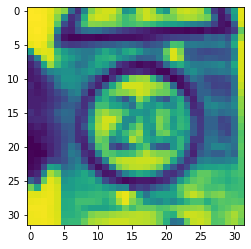

In [28]:
plt.imshow(X_test[990].reshape(32, 32)) 
print("Predicted sign: "+ str( 
        model.predict_classes(X_test[990].reshape(1, 32, 32, 1)))) 
